In [2]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Load model
Colorizing the image


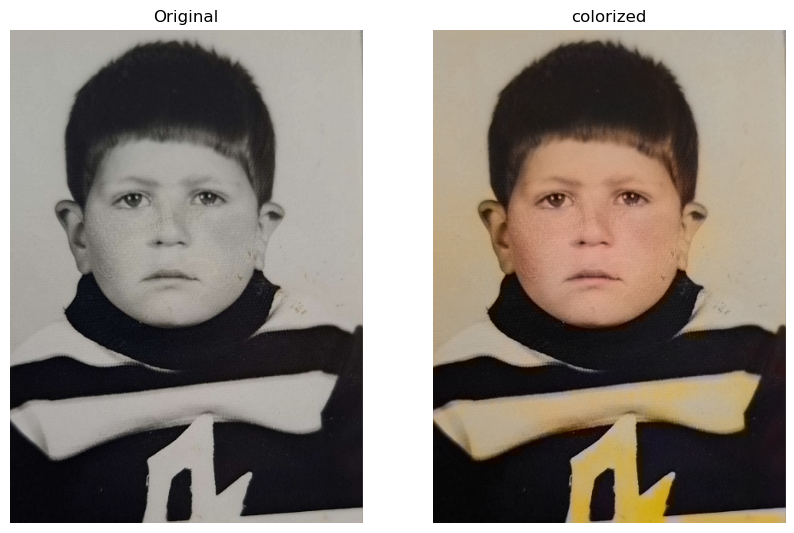

In [4]:
# Paths to load the model
DIR = r"C:\Users\Administrator"
PROTOTXT = os.path.join(DIR, r"model/colorization_deploy_v2.prototxt")
POINTS = os.path.join(DIR, r"model/pts_in_hull.npy")
MODEL = os.path.join(DIR, r"model/colorization_release_v2.caffemodel")

# Load the Model
print("Load model")
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
pts = np.load(POINTS)

# Load centers for ab channel quantization used for rebalancing.
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Load the input image
image = cv2.imread('Ali.png')
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

colorized = (255 * colorized).astype("uint8")

# cv2.imshow("Original", image)
# cv2.imshow("Colorized", colorized)
# cv2.waitKey(0)

plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(122);plt.imshow(colorized[...,::-1]);plt.title("colorized");plt.axis('off');

Colorizing the image


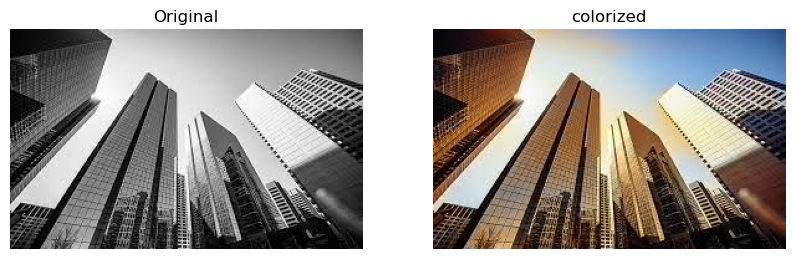

In [6]:
# Load the input image
image2 = cv2.imread('building.jpg')
scaled2 = image2.astype("float32") / 255.0
lab2 = cv2.cvtColor(scaled2, cv2.COLOR_BGR2LAB)

resized2 = cv2.resize(lab2, (224, 224))
L2 = cv2.split(resized2)[0]
L2 -= 50

print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L2))
ab2 = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab2 = cv2.resize(ab2, (image2.shape[1], image2.shape[0]))

L2 = cv2.split(lab2)[0]
colorized2 = np.concatenate((L2[:, :, np.newaxis], ab2), axis=2)

colorized2 = cv2.cvtColor(colorized2, cv2.COLOR_LAB2BGR)
colorized2= np.clip(colorized2, 0, 1)

colorized2 = (255 * colorized2).astype("uint8")

# cv2.imshow("Original", image)
# cv2.imshow("Colorized", colorized)
# cv2.waitKey(0)

plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(image2[...,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(122);plt.imshow(colorized2[...,::-1]);plt.title("colorized");plt.axis('off');